##### source: https://towardsdatascience.com/building-a-book-recommendation-system-using-keras

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading in data

In [9]:
dataset = pd.read_csv('data/book-ratings.dat')

In [10]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [11]:
dataset.shape

(981756, 3)

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [13]:
train.head()

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


In [14]:
test.head()

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


In [15]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [16]:
n_books = len(dataset.book_id.unique())
n_books

10000

#### Creating dot product model
<font size="3">Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.</font>

In [17]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Train on 785404 samples
Epoch 1/5
785404/785404 [==============================] - 37s 47us/sample - loss: 13.6038
Epoch 2/5
785404/785404 [==============================] - 36s 46us/sample - loss: 4.1828
Epoch 3/5
785404/785404 [==============================] - 36s 46us/sample - loss: 1.7227
Epoch 4/5
785404/785404 [==============================] - 37s 47us/sample - loss: 1.1764
Epoch 5/5
785404/785404 [==============================] - 43s 55us/sample - loss: 0.9544


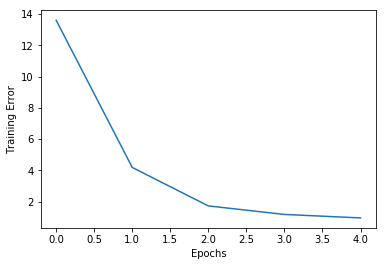

In [18]:
from tensorflow.keras.models import load_model

training = True
if not training and os.path.exists('model/regression_model.h5'):
    model = load_model('model/regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('model/regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [19]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 3s 14us/sample - loss: 1.1605


1.1605103693445937

In [20]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

for i in range(0,10):
    print(predictions[i], test.rating.iloc[i])

[5.1019435] 5
[4.000616] 4
[3.6738155] 3
[4.121255] 5
[3.6487558] 3
[4.2593017] 3
[4.4153433] 3
[4.5328856] 4
[3.9306533] 3
[3.6904478] 5


#### Creating Neural Network
<font size="3">Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.</font>

In [21]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Train on 785404 samples
Epoch 1/5
785404/785404 [==============================] - 42s 54us/sample - loss: 0.7999
Epoch 2/5
785404/785404 [==============================] - 40s 51us/sample - loss: 0.6887
Epoch 3/5
785404/785404 [==============================] - 40s 51us/sample - loss: 0.6616
Epoch 4/5
785404/785404 [==============================] - 40s 51us/sample - loss: 0.6380
Epoch 5/5
785404/785404 [==============================] - 40s 51us/sample - loss: 0.6160


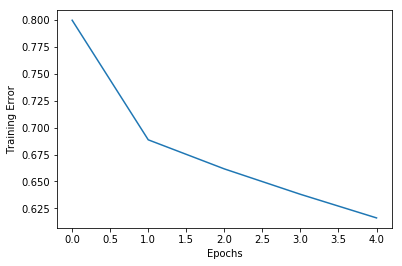

In [22]:
from tensorflow.keras.models import load_model

training = True
if not training and os.path.exists('model/regression_model2.h5'):
    model2 = load_model('model/regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('model/regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [23]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 4s 18us/sample - loss: 0.7085


0.7084994723187393

In [24]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.9829817] 5
[3.703845] 4
[3.3917148] 3
[4.07364] 5
[3.5491872] 3
[3.946414] 3
[3.7072256] 3
[4.9237766] 4
[4.1658573] 3
[4.1402516] 5


[None, None, None, None, None, None, None, None, None, None]

#### Visualizing Embeddings
<font size="3">Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.</font>

In [25]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [26]:
book_em_weights[:5]

array([[-0.00998034,  0.03045661, -0.03116804, -0.02875846, -0.03196937],
       [-1.1371026 ,  0.7369936 , -1.4775913 ,  1.2317276 , -1.3971246 ],
       [-1.336581  ,  0.6164674 , -1.3372852 ,  1.302503  , -1.3863375 ],
       [-0.92865556,  0.39809826, -1.1769674 ,  0.85039216, -1.0220686 ],
       [-1.7352183 ,  0.7167183 , -1.334781  ,  1.17407   , -1.4005383 ]],
      dtype=float32)

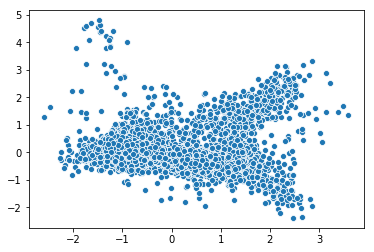

In [27]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [28]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0000001

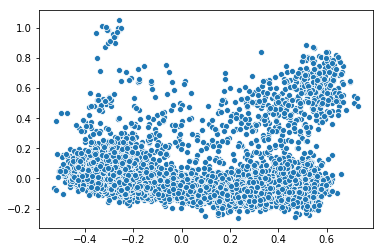

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.005s...
[t-SNE] Computed neighbors for 10001 samples in 0.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.025995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.371689
[t-SNE] KL

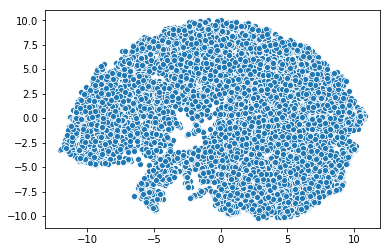

In [31]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

#### Making Recommendations
<font size="3">Making recommendations using our trained model is simple. We only need to feed in a user and all books and then select the books which have the highest predicted ratings for that specific user.</font>

In [32]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))

# user id 1185
user = np.array([1185 for i in range(len(book_data))])

In [33]:
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:10]

# print predicted scores
predictions[recommended_book_ids]

array([7.2286386, 6.8162823, 6.78494  , 6.7324367, 6.6614714, 6.647439 ,
       6.631755 , 6.5852013, 6.580657 , 6.5740004], dtype=float32)

In [35]:
books = pd.read_csv('data/book-books.dat')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [36]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
5857,5858,16297,16297,894955,171,425205959,9.780425e+12,Agatha Christie,1936.0,Cards on the Table,...,19577,23004,1031,112,857,6468,9372,6195,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7497,7498,29923,29923,168568,19,345434811,9.780345e+12,Jeff Shaara,1991.0,The Last Full Measure,...,12037,12619,299,64,218,1924,5063,5350,https://images.gr-assets.com/books/1331939776m...,https://images.gr-assets.com/books/1331939776s...
7659,7660,21330,21330,2910,15,1401204864,9.781401e+12,"Bill Willingham, Mark Buckingham, Steve Leialo...",2005.0,"Fables, Volume 5: The Mean Seasons",...,17909,18221,545,120,340,2889,7435,7437,https://images.gr-assets.com/books/1327870458m...,https://images.gr-assets.com/books/1327870458s...
7945,7946,39926,39926,836516,43,60512180,9.780061e+12,Naomi Wolf,1990.0,The Beauty Myth: How Images of Beauty Are Used...,...,13037,14266,790,234,790,3493,5552,4197,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8231,8232,10395,10395,13106,31,60731427,9.780061e+12,Franklin Foer,2004.0,How Soccer Explains the World: An Unlikely The...,...,9231,9944,716,246,669,2794,3715,2520,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8587,8588,432,432,2434710,25,140097317,9.780140e+12,Paul Auster,1985.0,City of Glass,...,10157,11176,683,230,853,2758,4320,3015,https://images.gr-assets.com/books/1309986722m...,https://images.gr-assets.com/books/1309986722s...
9317,9318,359461,359461,349583,17,1414310579,9.781414e+12,Dee Henderson,2001.0,The Guardian,...,11474,12163,348,34,165,1423,3762,6779,https://images.gr-assets.com/books/1406514522m...,https://images.gr-assets.com/books/1406514522s...
9516,9517,17810,17810,856346,39,NaN,9.780143e+12,"Ryū Murakami, Ralph McCarthy",1997.0,イン ザ・ミソスープ,...,9285,11545,950,313,1107,3586,4346,2193,https://images.gr-assets.com/books/1309282509m...,https://images.gr-assets.com/books/1309282509s...
9576,9577,96463,96463,6191271,28,552139130,9.780552e+12,Anne McCaffrey,1993.0,The Chronicles of Pern: First Fall,...,11762,13485,193,53,491,3324,4895,4722,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9981,9982,12444298,12444298,21900571,1,385344422,9.780385e+12,Karen Marie Moning,2016.0,Feverborn,...,11570,14194,1891,179,521,2308,4779,6407,https://images.gr-assets.com/books/1435195536m...,https://images.gr-assets.com/books/1435195536s...
